**DESCRIPTION**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales -  sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

**Analysis Task**

Statistical Model

- For Store 1 – Build  prediction models to forecast demand

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

- Select the model which gives best accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# Sorting and restructuring DF as per date and display day name

In [3]:
d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")
walmart_df=pd.read_csv('D:\PG_DSBA_Business_Analytics_\Data science with Python\Assignments\Assessment_1\\Walmart_Store_sales.csv', parse_dates=['Date'],date_parser=d_parser)

C:\Users\FB\AppData\Local\Temp/ipykernel_16812/1463154175.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser=lambda x:pd.datetime.strptime(x,"%d-%m-%Y")


In [4]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
pd.Series(walmart_df['Date'])

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [6]:
pd.Series(walmart_df['Date']).dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
6430    Friday
6431    Friday
6432    Friday
6433    Friday
6434    Friday
Name: Date, Length: 6435, dtype: object

In [7]:
walmart_df['DayOfWeek']=pd.Series(walmart_df['Date']).dt.day_name()

In [8]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Friday
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Friday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,Friday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,Friday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Friday


In [9]:
walmart_df.set_index(["Date"],inplace=True)

In [10]:
walmart_df.sort_index()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek
Date,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,Friday
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765,Friday
2010-02-05,37,536006.73,0,45.97,2.572,209.852966,8.554,Friday
2010-02-05,17,789036.02,0,23.11,2.666,126.442065,6.548,Friday
2010-02-05,30,465108.52,0,39.05,2.572,210.752605,8.324,Friday
...,...,...,...,...,...,...,...,...
2012-10-26,25,688940.94,0,56.69,3.882,216.151590,7.293,Friday
2012-10-26,5,319550.77,0,71.70,3.506,224.037814,5.422,Friday
2012-10-26,40,921264.52,0,49.65,3.917,138.728161,4.145,Friday


In [11]:
sorted_walmart_df=walmart_df.sort_index()

# Hypothesis test on Store #1

In [12]:
walmart_df.loc[(walmart_df['Store']==1)]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek
Date,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,Friday
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,Friday
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,Friday
...,...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908,Friday
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573,Friday
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573,Friday


In [13]:
new_walmart_df=walmart_df.loc[(walmart_df['Store']==1)]

In [14]:
new_walmart_df.Fuel_Price.mean()

3.2196993006993

In [15]:
new_walmart_df.Fuel_Price.std()

0.42731251609092646

In [19]:
3.2196993006993-3*0.42731251609092646

1.9377617524265207

In [23]:
new_walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
X=new_walmart_df.drop(['Store','Weekly_Sales','Date','Holiday_Flag','Temperature'],axis=1);X

,Fuel_Price,CPI,Unemployment
0,2.572,211.096358,8.106
1,2.548,211.242170,8.106
2,2.514,211.289143,8.106
3,2.561,211.319643,8.106
4,2.625,211.350143,8.106
...,...,...,...
138,3.666,222.981658,6.908
139,3.617,223.181477,6.573
140,3.601,223.381296,6.573
141,3.594,223.425723,6.573


In [25]:
Y=new_walmart_df['Weekly_Sales'];Y

0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

In [26]:
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
reg = sm.OLS(Y,X)
results = reg.fit()
results.params

const          -3.887096e+06
Fuel_Price     -6.483831e+04
CPI             2.179172e+04
Unemployment    1.240637e+05
dtype: float64

In [ ]:
#best fit model is: Y=-3887095.7723439676-64838.31315855075 * Fuel_Price + 21791.718959060094 * CPI +
# 124063.65641864117 *Unemployment

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.303
Date:                Wed, 29 Dec 2021   Prob (F-statistic):            0.00616
Time:                        21:58:06   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     139   BIC:                             3832.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.887e+06   1.74e+06     -2.234   

# Hypothesis is false as values of CPI Fuel price and unpemployment have negligible impact on sales as per t_test which shows t_values are outside CI

# 

# Prediction Model for Sales of Store1 

In [29]:
sorted_walmart_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765
2010-02-05,37,536006.73,0,45.97,2.572,209.852966,8.554
2010-02-05,17,789036.02,0,23.11,2.666,126.442065,6.548
2010-02-05,30,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...
2012-10-26,25,688940.94,0,56.69,3.882,216.151590,7.293
2012-10-26,5,319550.77,0,71.70,3.506,224.037814,5.422
2012-10-26,40,921264.52,0,49.65,3.917,138.728161,4.145


In [10]:
sorted_walmart_df.loc[(sorted_walmart_df['Store']==1)]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


In [11]:
store1_df=sorted_walmart_df.loc[(sorted_walmart_df['Store']==1)]

In [12]:
store1_df.groupby(store1_df.index)[['Weekly_Sales']].mean()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [13]:
store1_df_new=store1_df.groupby(store1_df.index)[['Weekly_Sales']].mean()

In [22]:
#Rolling statistics test for stationarity
roll_mean=store1_df_new.rolling(window=12).mean()
roll_std=store1_df_new.rolling(window=12).std()

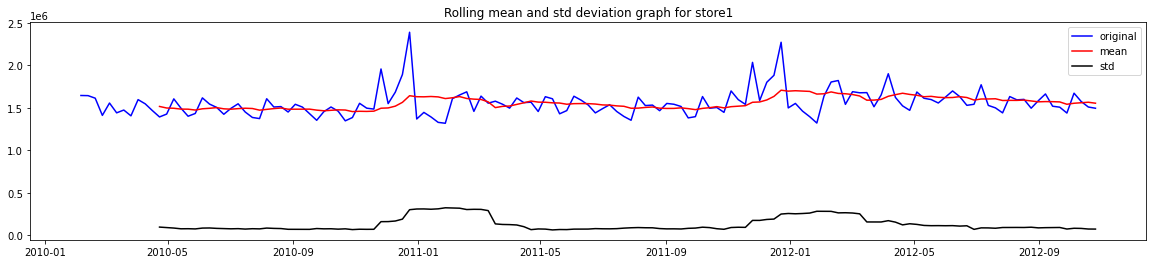

In [45]:
#plot rolling statistics
plt.figure(figsize=(20,4))
orig=plt.plot(store1_df_new,color='blue',label='original')
mean=plt.plot(roll_mean,color='red',label='mean')
std=plt.plot(roll_std,color='black',label='std')
plt.xlabel=('Date')
plt.ylabel=('Weekly sales')
plt.legend(loc='best')
plt.title('Rolling mean and std deviation graph for store1')
plt.show()

In [59]:
#perform dikey fuller test
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(store1_df_new['Weekly_Sales'],autolag='AIC')
dfout=pd.Series(dftest[0:4],index=['Test Stat','P-value','#Lags','NO of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key]=value
print(dfout)

Test Stat                   -5.102186
P-value                      0.000014
#Lags                        4.000000
NO of observations used    138.000000
Critical value (1%)         -3.478648
Critical value (5%)         -2.882722
Critical value (10%)        -2.578065
dtype: float64


# Conclusion:The given model is stationary and can be forecasted statistically 

# SARIMAX model forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 3137311715389.2705')

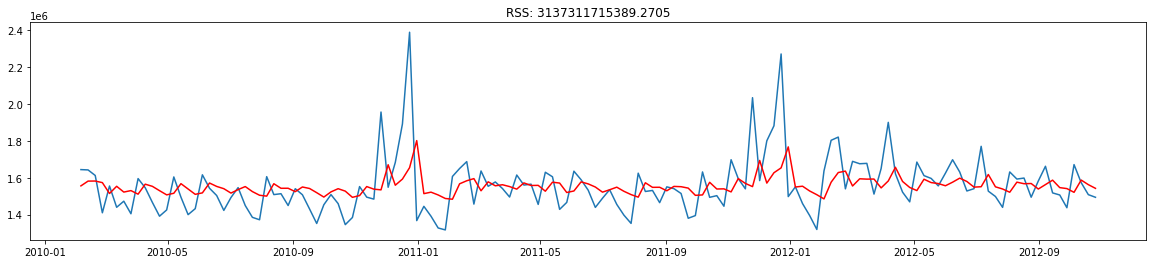

In [99]:
Reg = sm.tsa.SARIMAX(store1_df_new, order=(1, 0, 1), trend='c')
res_SARIMAX=Reg.fit()
plt.figure(figsize=(20,4))
plt.plot(store1_df_new)
plt.plot(res_SARIMAX.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((res_SARIMAX.fittedvalues-store1_df_new['Weekly_Sales'])**2))

In [78]:
# make the predictions for 11 steps ahead
predictions_int = res_SARIMAX.forecast(steps=11)
predictions_int.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2012-11-02    1.536663e+06
2012-11-09    1.549671e+06
2012-11-16    1.553605e+06
2012-11-23    1.554795e+06
2012-11-30    1.555155e+06
2012-12-07    1.555264e+06
2012-12-14    1.555297e+06
2012-12-21    1.555307e+06
2012-12-28    1.555310e+06
2013-01-04    1.555311e+06
2013-01-11    1.555311e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64>

# ARIMA model for forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 3133232870551.2969')

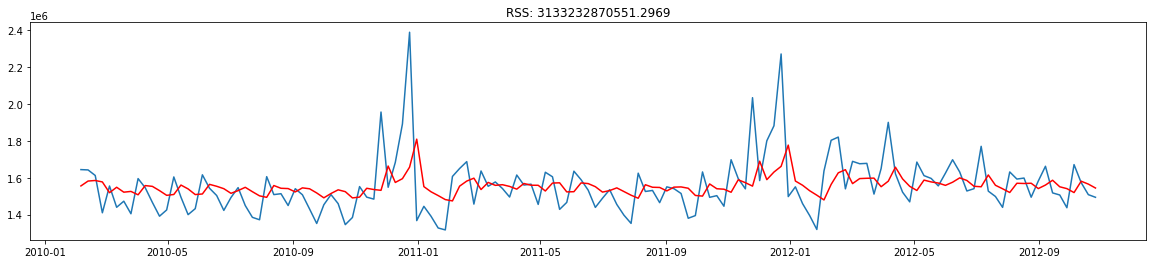

In [98]:
from statsmodels.tsa.arima_model import ARIMA
AReg=sm.tsa.ARIMA(store1_df_new, order=(1, 0, 1))
res_ARIMA=AReg.fit()
plt.figure(figsize=(20,4))
plt.plot(store1_df_new)
plt.plot(res_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((res_ARIMA.fittedvalues-store1_df_new['Weekly_Sales'])**2))


In [114]:
predictions_int1 = pd.Series(res_ARIMA.fittedvalues,copy=True)
predictions_int1

Date
2010-02-05    1.555264e+06
2010-02-12    1.581659e+06
2010-02-19    1.584738e+06
2010-02-26    1.576876e+06
2010-03-05    1.518593e+06
                  ...     
2012-09-28    1.540571e+06
2012-10-05    1.519248e+06
2012-10-12    1.580727e+06
2012-10-19    1.565184e+06
2012-10-26    1.543935e+06
Length: 143, dtype: float64

<AxesSubplot:xlabel='Date'>

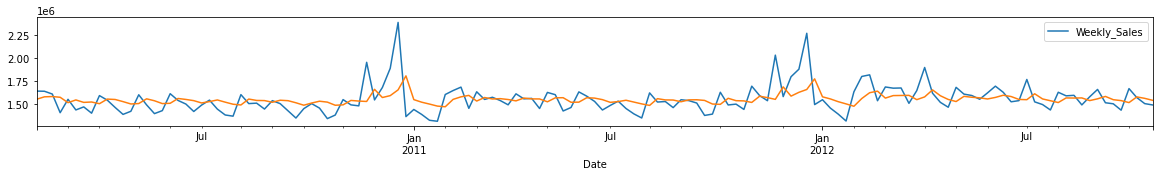

In [123]:
# plot prediction curve
ax=store1_df_new.plot(figsize=(20,2))
predictions_int1.plot(figsize=(20,2),ax=ax)

# Selecting ARIMA model we can predict better as it has less value of error